# **Test Image Processing**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import shutil
import cv2
import os

In [ ]:
!unzip '/content/drive/MyDrive/depression anxiety.zip'

In [ ]:
img = cv2.imread('/content/depression anxiety/depression anxiety_1.jpg')
grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

img_pil = Image.fromarray(grayscale)
img_28 = np.array(img_pil.resize((224, 224)))
print(img_28.shape)

(224, 224)


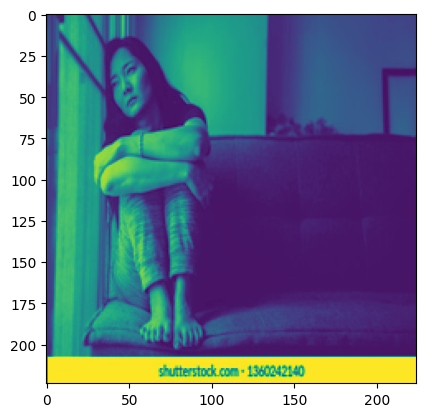

In [ ]:
plt.imshow(img_28)

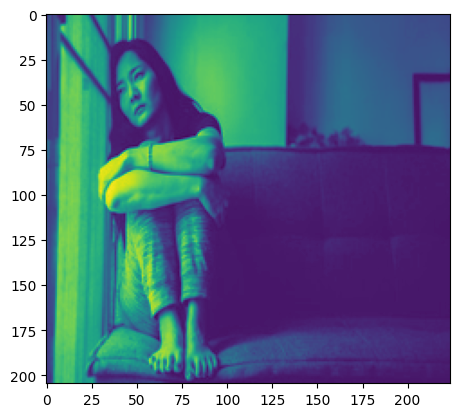

In [ ]:
cropped_image = img_28[:205, :]
plt.imshow(cropped_image)

In [ ]:
img_pil = Image.fromarray(cropped_image)
img_28 = np.array(img_pil.resize((224, 224), Image.ANTIALIAS))

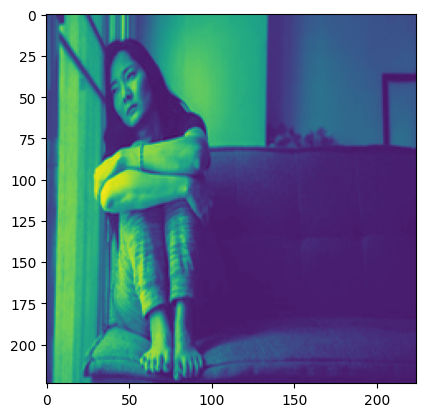

In [ ]:
plt.imshow(img_28)

# **Image Data Processing**

In [3]:
def resize_img(img):
  pillow_img = Image.fromarray(img)
  resized_img = np.array(pillow_img.resize((224, 224), Image.ANTIALIAS))
  return resized_img

def transform_image(path):
  img = cv2.imread(path)
  grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  resized_img = resize_img(grayscale)

  cropped_image = resized_img[0:205, :]
  resized_img = resize_img(cropped_image)
  image = Image.fromarray(resized_img)
  return image

def rename_files(DIR):
  files = sorted(os.listdir(DIR))

  for idx, file in enumerate(files):
    img_path = os.path.join(DIR, file)
    new_path = os.path.join(DIR, 'depression_{}.jpg'.format(idx+1))
    os.rename(img_path, new_path)

  print('Done')

In [ ]:
DIR = '/content/sadness'

In [ ]:
files = sorted(os.listdir(DIR))

for idx, file in enumerate(files):
  img_path = os.path.join(DIR, file)
  transformed_img = transform_image(img_path)
  transformed_img.save(img_path)

print('Done')

Done


In [ ]:
shutil.copytree('/content/sadness/', '/content/img/', dirs_exist_ok=True)

'/content/img/'

# **Text Data Processing**

In [ ]:
def process_images(path):
  name = path.split('/')[-1]
  return 'img/' + name

In [ ]:
depression_df = pd.read_csv('/content/depression.csv')
happiness_df = pd.read_csv('/content/happiness.csv')
joy_df = pd.read_csv('/content/joy.csv')
sad_df = pd.read_csv('/content/sadness.csv')

In [ ]:
depression_df['image'] = depression_df['image'].apply(process_images)
happiness_df['image'] = happiness_df['image'].apply(process_images)
joy_df['image'] = joy_df['image'].apply(process_images)
sad_df['image'] = sad_df['image'].apply(process_images)

In [ ]:
depression_df['label'] = 1
happiness_df['label'] = 0
joy_df['label'] = 0
sad_df['label'] = 1

In [7]:
main_df = pd.concat([depression_df, happiness_df, joy_df, sad_df])
main_df = main_df.sample(frac = 1)
main_df.shape

(5475, 5)

In [13]:
main_df.head()

,id,image,title,label
0,207,img/sadness_207.jpg,Black pug dog isolated on a white background S...,1
1,12,img/happiness_12.jpg,Image of happy young lady standing isolated ov...,0
2,558,img/happiness_558.jpg,Happy Asian woman smiling and Jumping like ru...,0
3,1404,img/joy_1404.jpg,Cheerful successful man dancing funny making m...,0
4,240,img/sadness_240.jpg,Coronavirus COVID-19 impact on retail business...,1


In [14]:
main_df['label'].value_counts()

1    3120
0    2355
Name: label, dtype: int64

In [15]:
train, validation = train_test_split(main_df, test_size=0.2, stratify=main_df['label'], random_state=42)
validation, test = train_test_split(validation, test_size=0.5, stratify=validation['label'], random_state=42)

In [16]:
print(train.shape)
print(validation.shape)
print(test.shape)

(4380, 4)
(547, 4)
(548, 4)


In [ ]:
train.to_json('/content/main_data/train.jsonl', orient='records', lines=True)
validation.to_json('/content/main_data/val.jsonl', orient='records', lines=True)
test.to_json('/content/main_data/test.jsonl', orient='records', lines=True)

In [ ]:
!zip -r '/content/depression_dataset.zip' '/content/main_data'

In [ ]:
shutil.copy('/content/main_data.zip', '/content/drive/MyDrive')

'/content/drive/MyDrive/main_data.zip'